# Dataset

## Descripcion del Dataset

Un conjunto de datos creado a partir de una institución de educación superior (adquirido de varias
bases de datos independientes) relacionado con estudiantes matriculados en diferentes carreras
universitarias, como agronomía, diseño, educación, enfermería, periodismo, administración,
servicio social y tecnologías. El conjunto de datos incluye información conocida en el momento de
la inscripción de los estudiantes (ruta académica, demografía y factores socioeconómicos) y el
rendimiento académico de los estudiantes al final del primer y segundo semestre. Los datos se
utilizan para construir modelos de clasificación para predecir el abandono escolar y el éxito
académico de los estudiantes. El problema se formula como una tarea de clasificación de tres
categorías, en la que existe un fuerte desequilibrio hacia una de las clases.

### Intalacion de librerias

In [ ]:
import warnings
warnings.simplefilter(action="ignore")
# conda install -c conda-forge sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install sweetviz

In [ ]:
import pandas as pd # cargar y manipular datos
import sweetviz as sv # herramienta de análisis exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # procesamiento matemático
from scipy.stats import norm # normal

### Carga del Dataset

In [ ]:
data = pd.read_csv("data.csv",sep=";", index_col=0)

In [ ]:
data.head(10)

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,,,,,,,,,,,,,,,,,,,,,
1,17,5,171,1,1,122.0,1,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,9,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
1,1,1,9500,1,1,142.0,1,19,38,7,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
1,18,4,9254,1,1,119.0,1,37,37,9,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
1,1,3,9238,1,1,137.0,62,1,1,9,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate


#Tareas

## 1.- Verificar si existen inconsistencias en los datos.

In [ ]:
# Verificamos la informacion acerca de el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 1 to 1
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Course                                          4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                         

In [ ]:
data.describe()

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
data.dtypes

Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship ho

**Debemos buscar si existen valores Nulos en el dataset**


In [ ]:
data.isnull().sum()

Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

**Buscamos valores Duplicados**

In [ ]:
data.duplicated().sum()

0

## 2.- Realizar el análisis exploratorio. (interpretar 2 principales de cada tipo, justificar su elección)

### Datos Categoricos
Como se vio anteriormente contamos con 28 datos categoricos

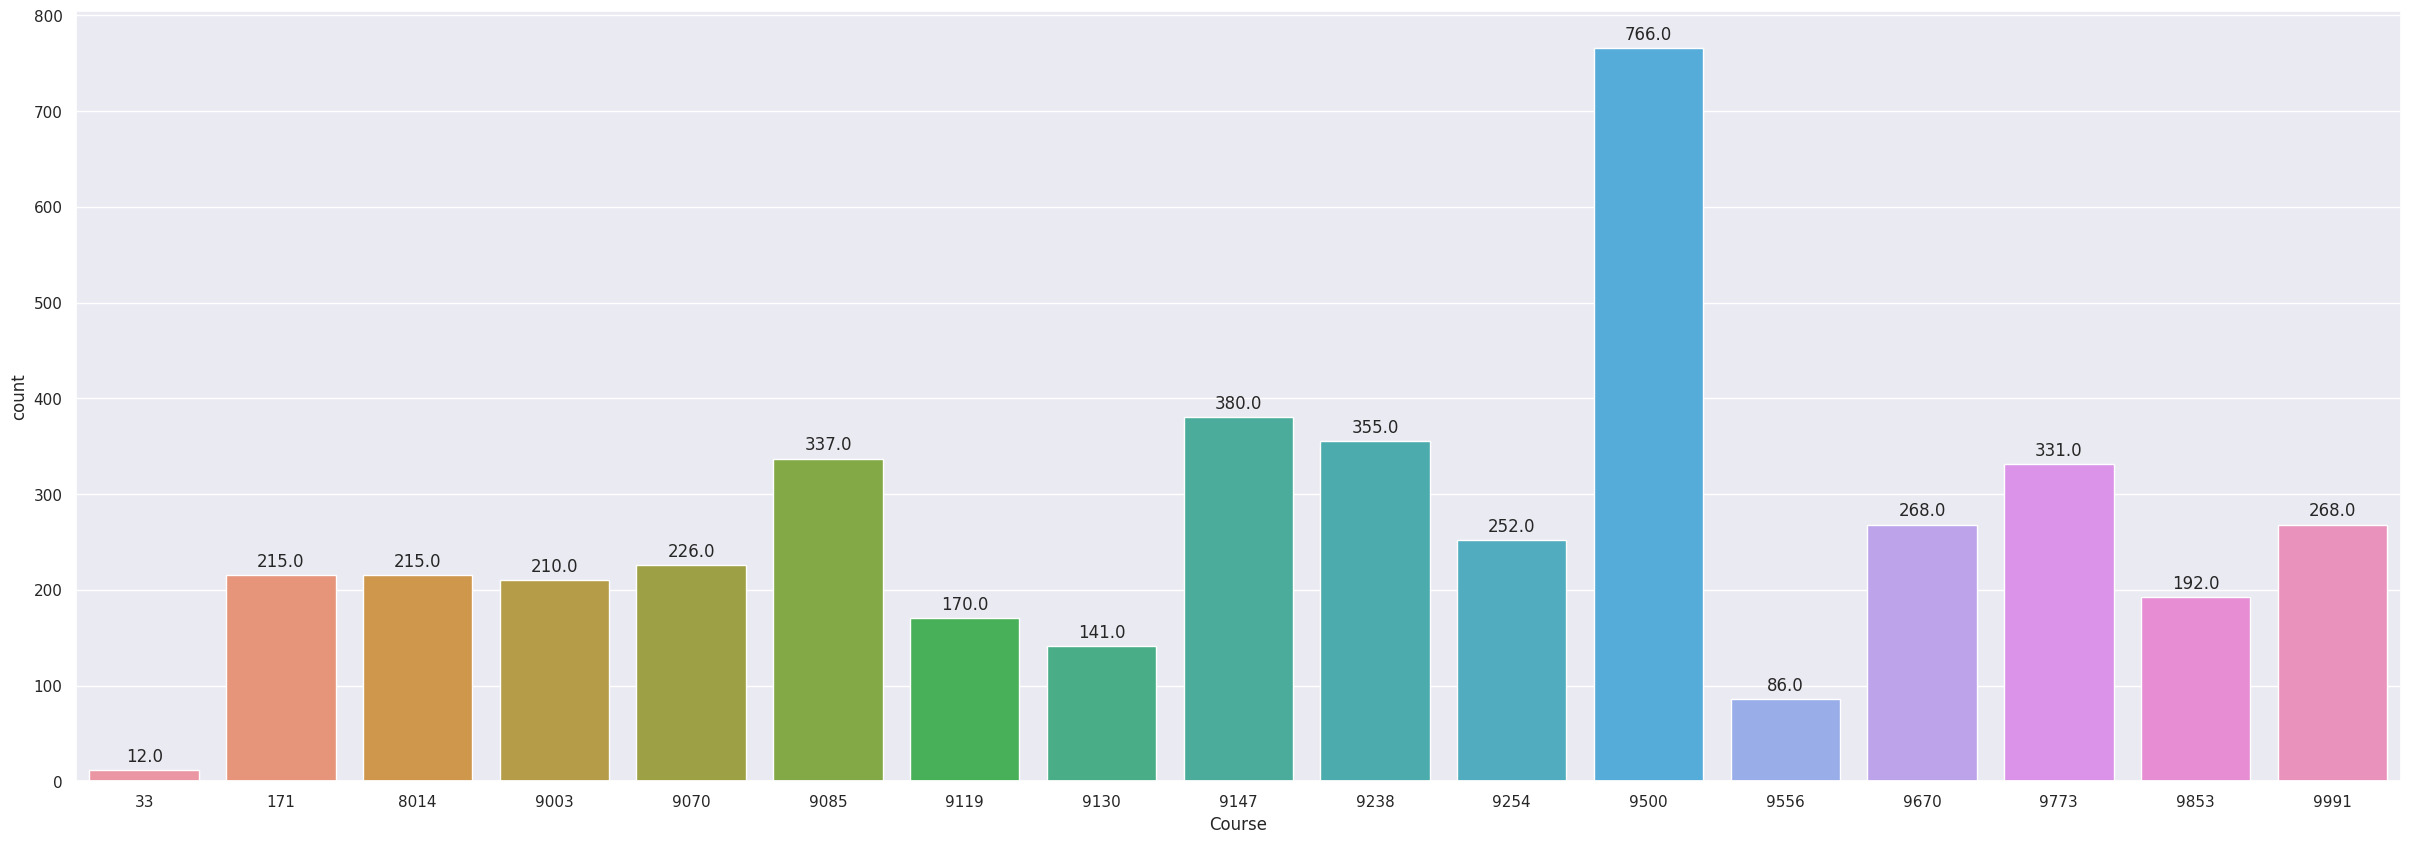

In [ ]:
# Utilizaremos para la visualizacion la variable Course y un grafico de barras
plt.figure(figsize=(30, 10))
# Crear el gráfico de barras
ax = sns.countplot(x='Course', data=data)

# Añadir las etiquetas para visualizar el numero de elementos por categoria
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

#### Interpretacion 1:
* Existen 17 clases con un identificador de clase de un entero
* La clase identificada con "9500" es la que mayor cantidad de alumnos tiene matriculados, en total cuenta con 766 alumnos
* La clase identificada con "33" es la que con menos alumnos cuenta, teniendo solo 12 alumnos

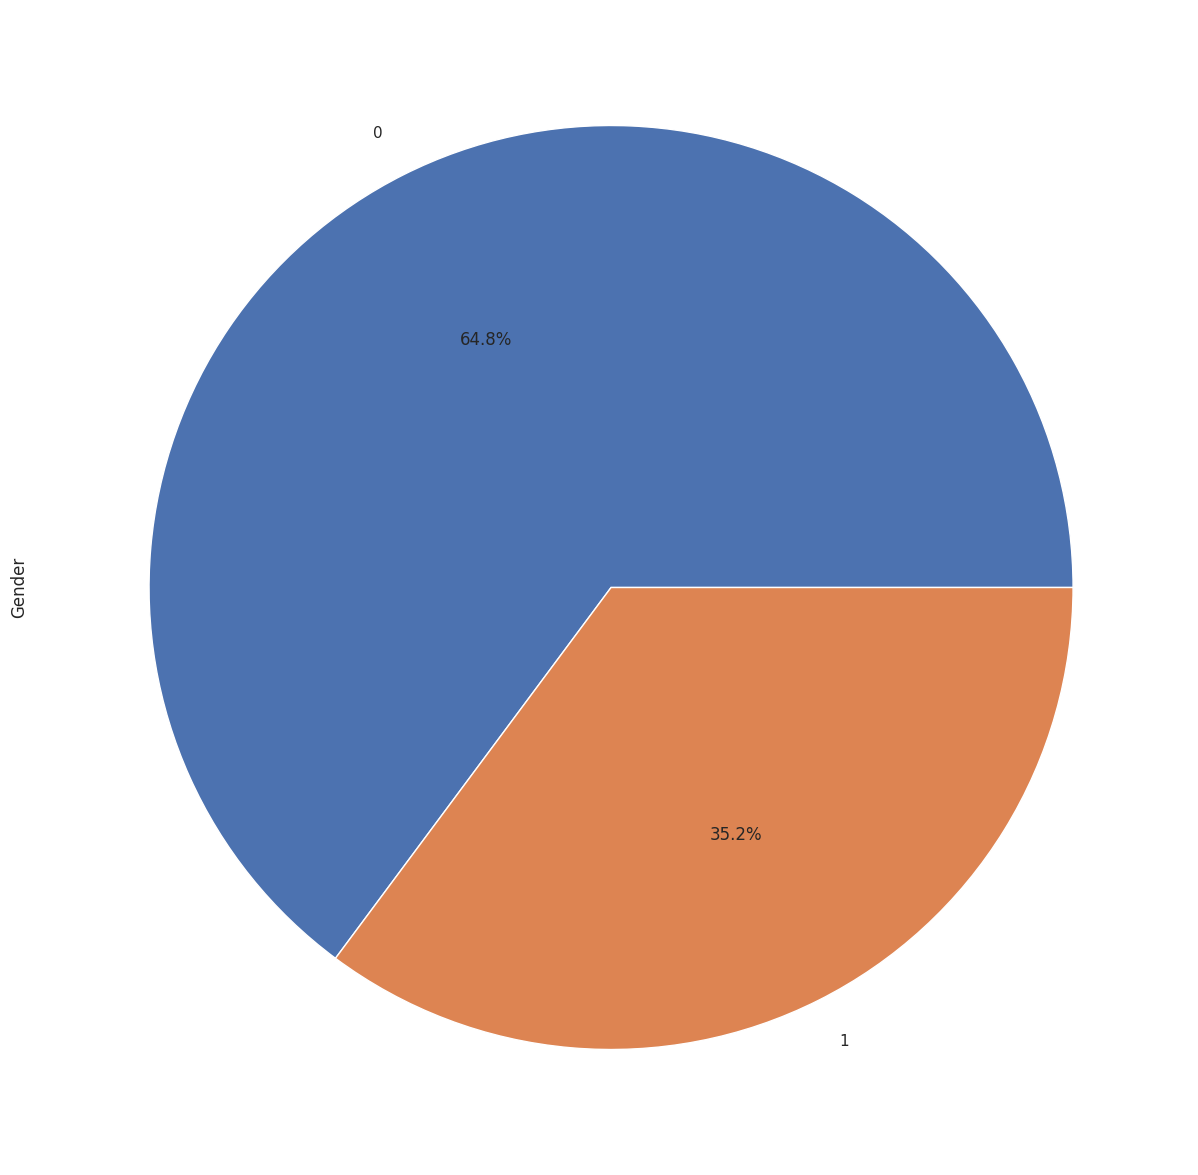

In [ ]:
# Utilizaremos ahora la variable categoria Gender y un grafico de pay
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#### Interpretacion 2:
* Para el genero contamos con 2 clases dentificadas con 0 y 1
* La clase identificada con "0" cuenta con el 64.8% de el total de alumnos
* La clase identificada con "1" cuenta con el 35.2% de el total de alumnos

### Datos Cuantitaticos
Como se vio anteriormente contamos con 7 datos Cuantitativos o numericos

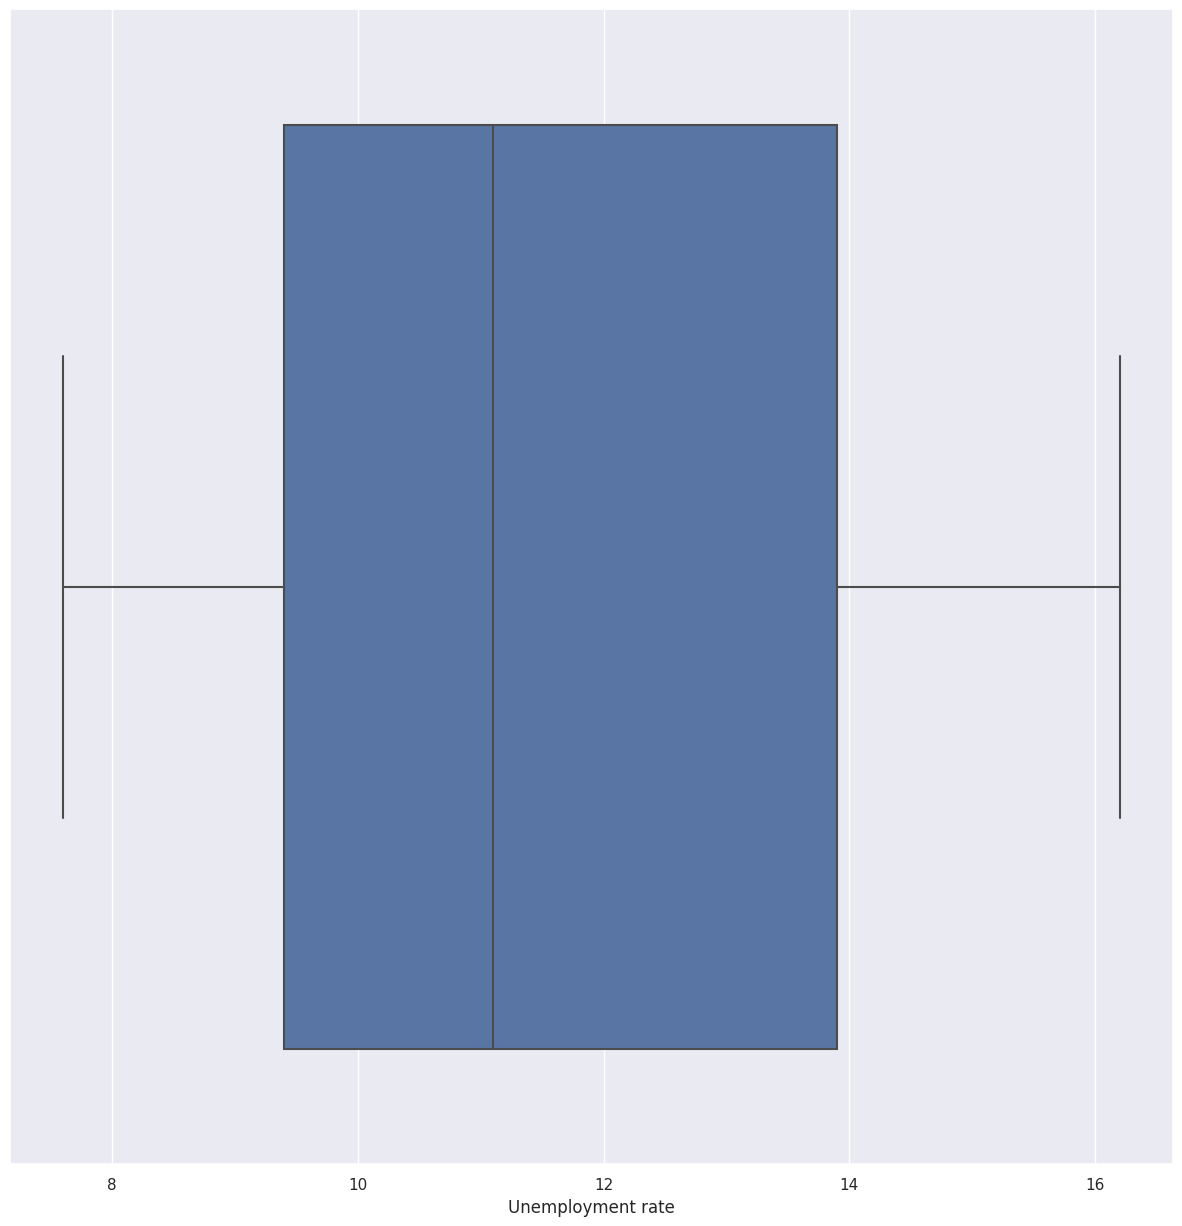

In [ ]:
# Utilizaremos un Boxplot y la variable Unemployment rate
sns.boxplot(x=data['Unemployment rate'])
plt.show()

#### Interpretacion 1:
* Para el Unemployment rate tenemos valores entre 7.6 y 16.2
* La media se encuentra en 11.566139
* No existen Outlayers para esta variable

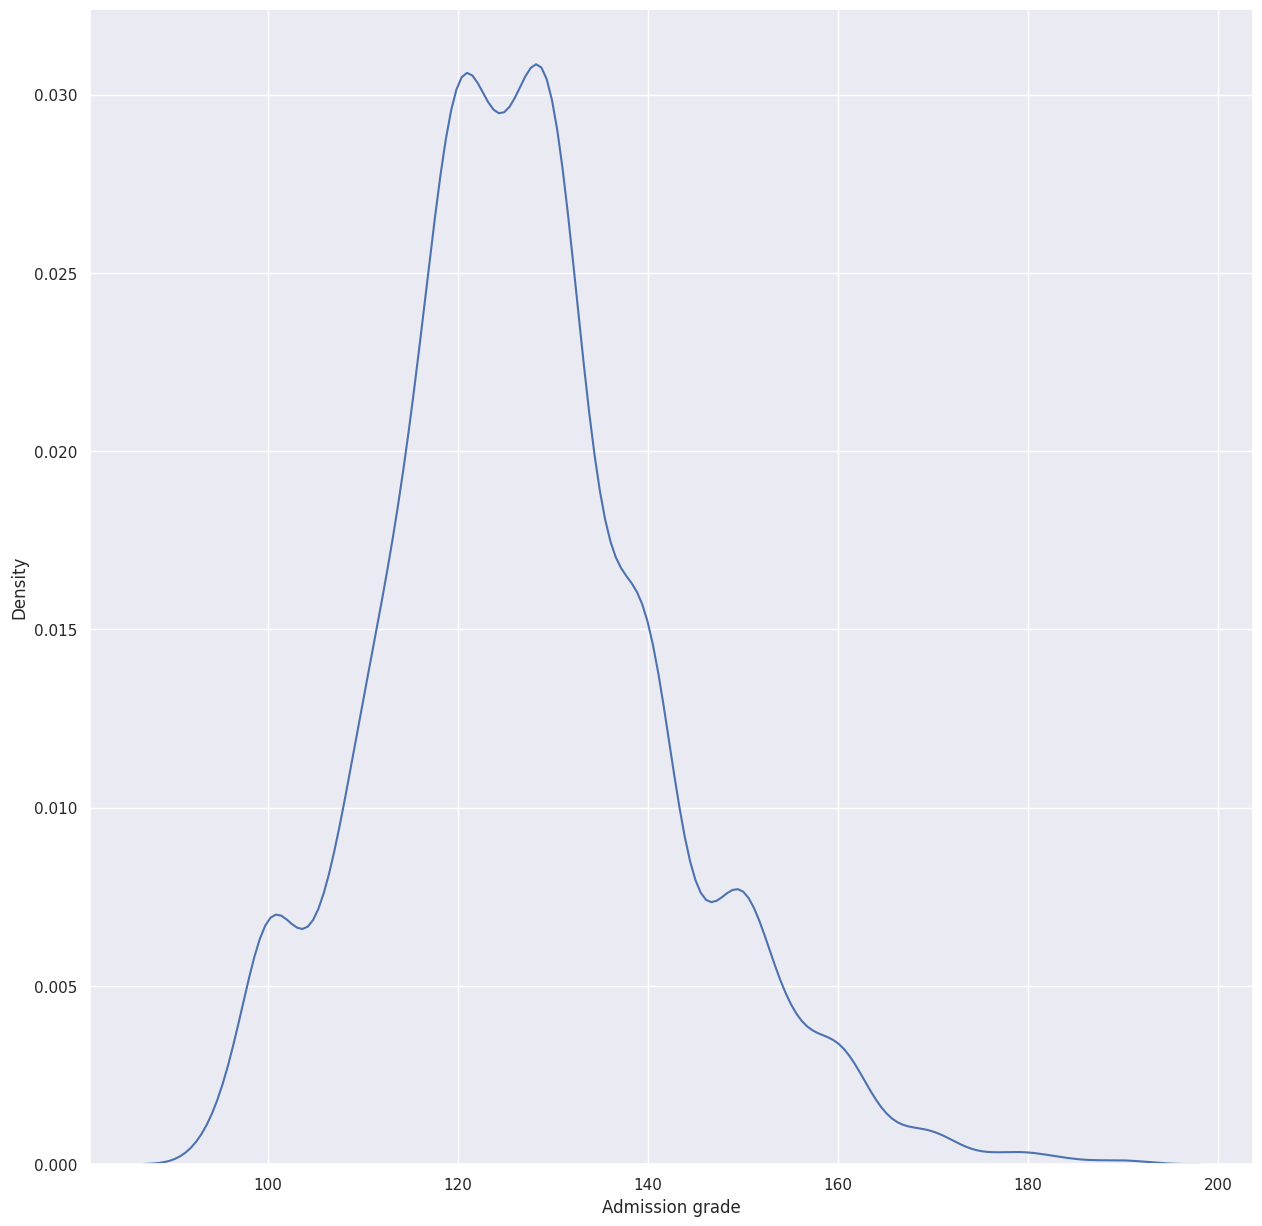

In [ ]:
# Utilizaremos un Grafico de Densidad y la variable Admission grade
sns.kdeplot(data['Admission grade'])
plt.show()

#### Interpretacion 2:
* Para esta variable se tienen continuos entre 95 y 190
* Se puede observar una tendencia a llevar una distribucion normal


## 3.- Hacer el escalado multidimencional para detectar posibles clusters en los datos.

## 4.- Realizar el análisis de asociación entre variables. (interpretar 2 principales de cada tipo, justificar su elección)

### a) Categorico X Categorico

In [ ]:
# Utilizaremos Gender y Course, ambas variables categoricas
pd.crosstab(data['Gender'],data['Course'])

Course,33,171,8014,9003,9070,9085,9119,9130,9147,9238,9254,9500,9556,9670,9773,9853,9991
Gender,,,,,,,,,,,,,,,,,
0,3,98,173,61,130,277,7,79,218,309,152,617,67,146,216,183,132
1,9,117,42,149,96,60,163,62,162,46,100,149,19,122,115,9,136


#### Interpretacion 1:
* Se cuentan con 17 cursos identificados con un numero entero
* Se cuentan con 2 generos identificados con 1 y 0
* La clase con mayor cantidad de estudiantes de genero 0 es el curso identificado con 9500 que cuenta con 617 estudiantes, y la clase de menos estudiantes es la identificada con 33 con solo 3 estudiantes
* La clase con mayor cantidad de estudiantes de genero 1 es el curso identificado con 9147 que cuenta con 162 estudiantes, y la clase de menos estudiantes son 2 con igual cantidad de estudiantes la identificada con 33 y con 9853 con 9 estudiantes
* Existe mucha variabiñidad entre la cantidad de estudiantes en cada una de las clases lo cual podria ser morivo de estudio
* por lo general en las clases existen mucha mas cantodad de personas de genero 0 que de genero 0 pero por falta de informacion no se puede saber a que genero corresponde cada identificado ya sea 1 o 0.


In [ ]:
# Utilizaremos Gender y Course, ambas variables categoricas
pd.crosstab(data['Educational special needs'],data['Course'])

Course,33,171,8014,9003,9070,9085,9119,9130,9147,9238,9254,9500,9556,9670,9773,9853,9991
Educational special needs,,,,,,,,,,,,,,,,,
0,12,210,215,210,218,334,169,141,376,347,252,760,85,263,325,189,267
1,0,5,0,0,8,3,1,0,4,8,0,6,1,5,6,3,1


#### Interpretacion 2:
* Se cuentan con 17 cursos identificados con un numero entero
* Se tiene un atributo que nos dice si las personas requieren una educion especial o no, 1 siendo positiva y 0 siendo negativa
* La clase con mayor cantidad de estudiantes con necesidades educativas especiales es la identificada con 9238 con 8 estudiantes
* Tenemos 5 cursos los cuales no tienen estudiantes con necesidad4es educativas especiales, las clases identificadas con 171, 8014, 9003, 9130 y 9254



### b) Categorico X Numérico

In [ ]:
data.groupby('Gender')['Unemployment rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,2868.0,11.522594,2.591347,7.6,9.4,11.1,12.7,16.2
1,1556.0,11.646401,2.791633,7.6,9.4,11.1,13.9,16.2


#### Interpretacion 1:
* Se puede observar que la media para ambos generos en cuanto a la tasa de desempleo es muyuu parecida por lo que se puede asumir que no existen preferencias por genero en cuanto a la empleabilidad
* Los valores minimos y maximos de mla tasa de desempleo son iguales al igual que los cuartiles excepto el tercer rango intercuartilico(75%) en el cual se observa que para el genero 1 es un poco mayor



In [ ]:
data.groupby('Educational special needs')['Admission grade'].describe()

,count,mean,std,min,25%,50%,75%,max
Educational special needs,,,,,,,,
0,4373.0,127.006746,14.499876,95.0,117.90,126.1,134.9,190.0
1,51.0,124.523529,12.743918,100.6,117.75,122.5,130.8,160.0


#### Interpretacion 2:
* Se puede observar que la media para la nota de admision es ligeramente mayor para los estudiantes que no tienen nececsidades educativas especiales
* Curiosamente se puede observar que la nota de admision minima para los estudiantes con necesidades educativas especiales es mayor
* Se puede ver tambien que la nota maxima es superior para las personas sin necesidades educativas especiales


### c) Numérico X Numérico

<Axes: >

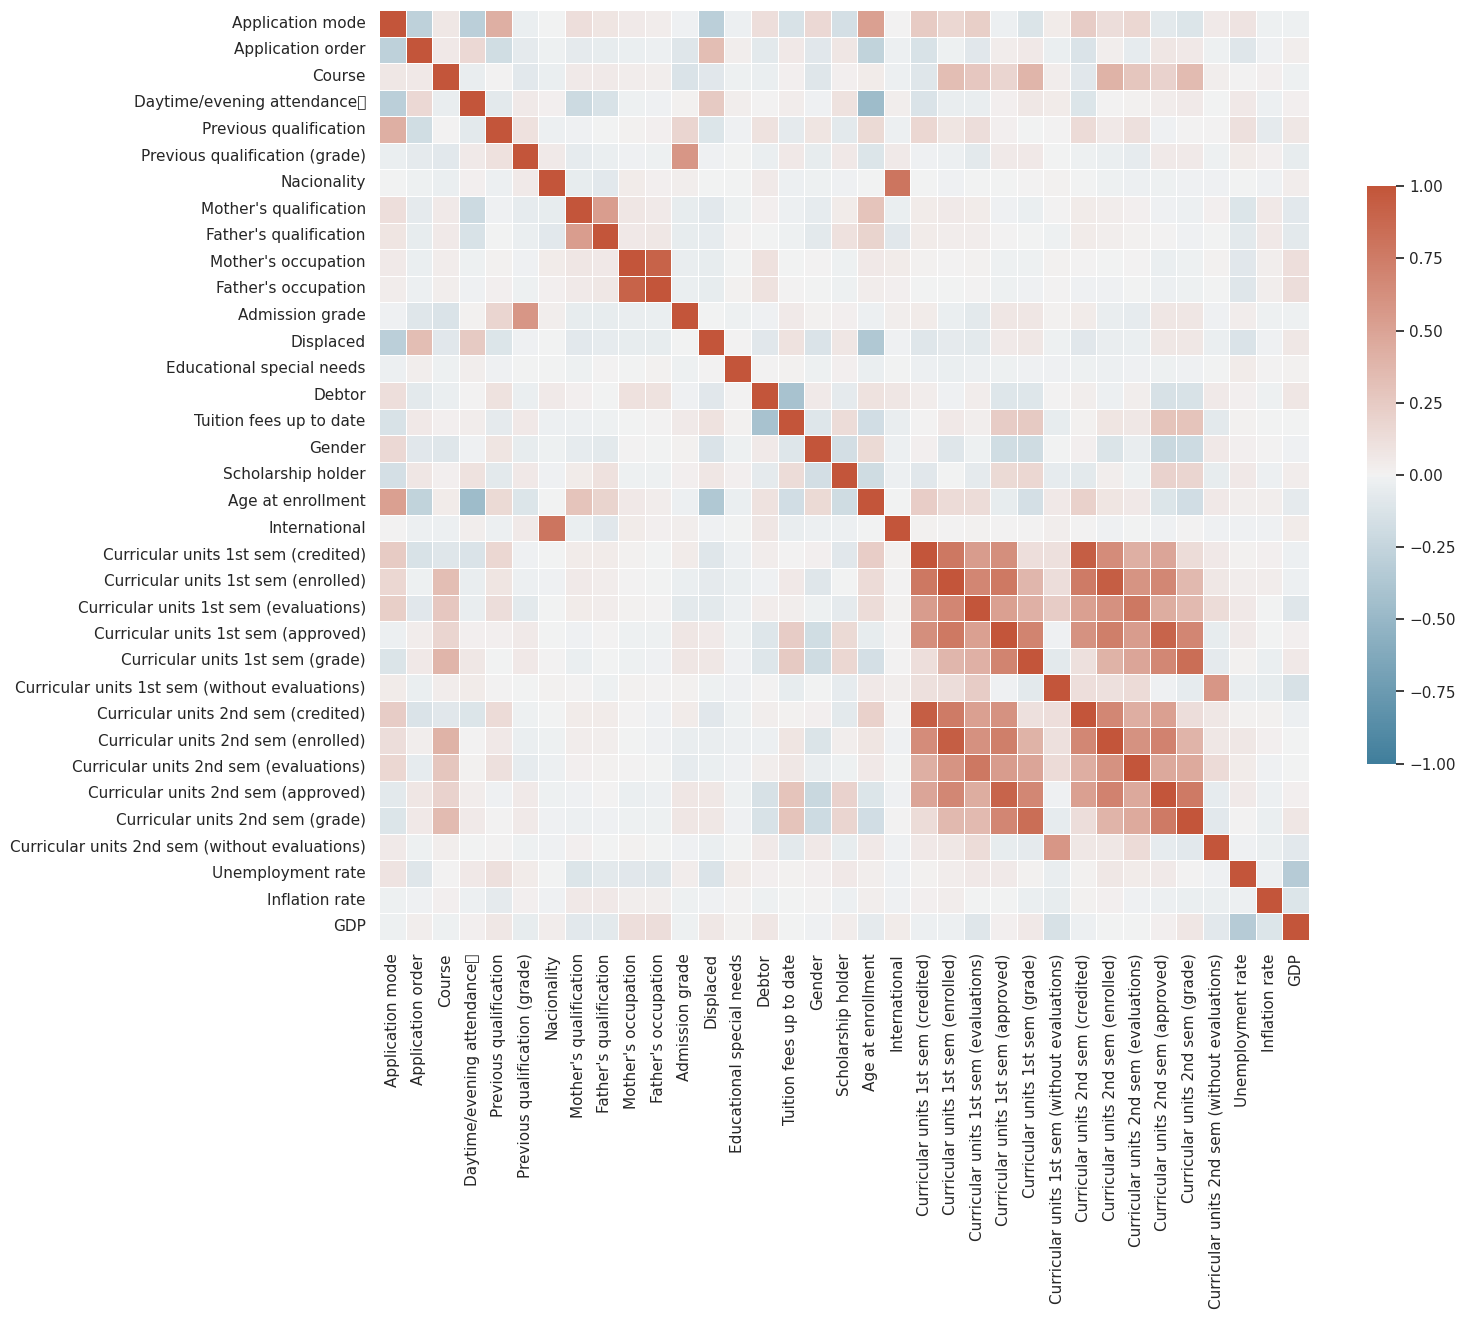

In [ ]:
corr=data.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

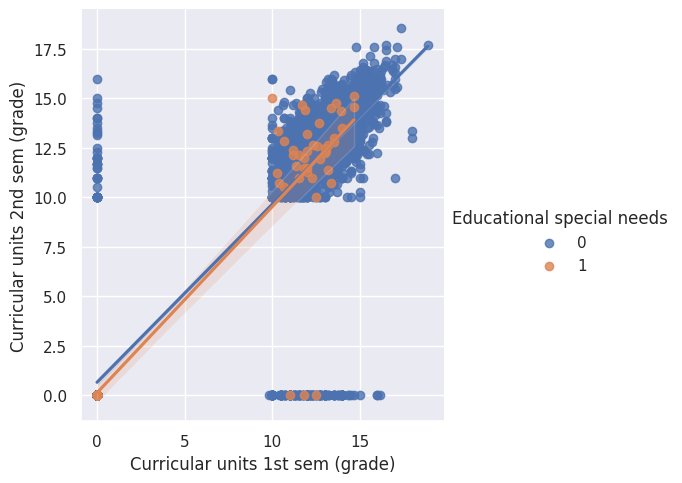

In [ ]:
# Usaremos las variables numericas con mayor correlacion

# En este caso usaremos Curricular units 1st sem (grade) y Curricular units 2nd sem (grade)
# E identificaremos tambien si tienen nececidades educativas especiales
sns.lmplot(data=data,x="Curricular units 1st sem (grade)",y="Curricular units 2nd sem (grade)",hue='Educational special needs')

#### Interpretacion 1:
* Se puede observar una gran densidade de puntos para valores mayores a 10 en ambos ejes por lo que se asume que las unidades curriculares para el primer y segundo semestre son casi simpre mayores a 10
* Existen valores de 0 en ambos ejes por lo que se asume que las unidades curriculares en ambos semestres en algunas ocaciones son 0
* de esto se puede ver que las unidades curriculares para el primer semestre pùeden hallarse en valores de 0 y tambien valores mayores a 10


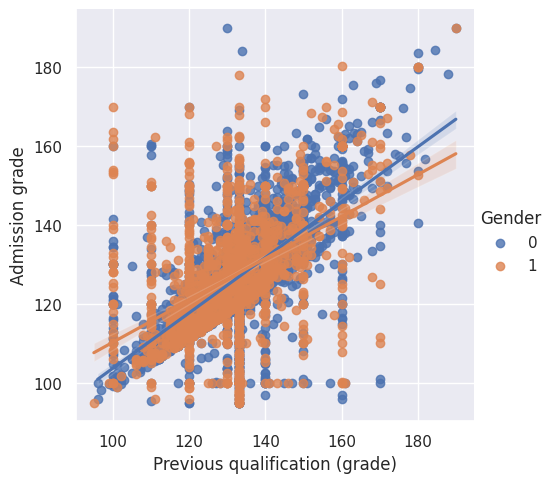

In [ ]:
# En este caso usaremos Previous qualification (grade) y Admission grade
# E identificaremos tambien el genero
sns.lmplot(data=data,x="Previous qualification (grade)",y="Admission grade",hue='Gender')

#### Interpretacion 2:
* Se puede observar una gran densidad de puntos ubicados en su mayoria en el centro de la grafica
* Se pueden observar lineas corespondiente a las calificaciones previas lo cual podria ser un motivo de estudio ya que muchos estudiantes obtuvieron la misma calificaion previa lo cuakl nos aria sospechar de que algo raro podria haber sucedido con esas calificaiones
